In [4]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import io


#create empty bayesian network as well as give it a name
bn=gum.BayesNet('YieldSuccess')
print(bn)

#fast way to create nodes and declare arcs
bn=gum.fastBN("drought resistance->yield<-soil quality<-soil moisture<-temperature;precipitation->soil moisture; temperature<-precipitation; sunlight->temperature; potassium->drought resistance")


print(bn)
bn
#bn = gum.saveBN(bn,"out/wheatYield.bif")



BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}
BN{nodes: 8, arcs: 8, domainSize: 256, dim: 19, mem: 304o}


In [22]:
bn.cpt("precipitation").fillWith([0.67,0.33])



(pyAgrum.Potential<double>@0x12bbd4340) 
  precipitation    |
0        |1        |
---------|---------|
 0.6700  | 0.3300  |

In [23]:
bn.cpt("sunlight").fillWith([0.48,0.52])


(pyAgrum.Potential<double>@0x12bbc7da0) 
  sunlight         |
0        |1        |
---------|---------|
 0.4800  | 0.5200  |

In [21]:
bn.cpt("temperature")[{'precipitation': 0, 'sunlight': 0}] = [0.28, 0.72]
bn.cpt("temperature")[{'precipitation': 0, 'sunlight': 1}] = [0.08, 0.92]
bn.cpt("temperature")[{'precipitation': 1, 'sunlight': 0}] = [0.32, 0.68]
bn.cpt("temperature")[{'precipitation': 1, 'sunlight': 1}] = [0.18, 0.82]
bn.cpt("temperature")

(pyAgrum.Potential<double>@0x12bbc8100) 
             ||  temperature      |
precip|sunlig||0        |1        |
------|------||---------|---------|
0     |0     || 0.2800  | 0.7200  |
1     |0     || 0.3200  | 0.6800  |
0     |1     || 0.0800  | 0.9200  |
1     |1     || 0.1800  | 0.8200  |

In [8]:
bn.cpt("soil moisture")[{'precipitation': 0, 'temperature': 0}] = [0.7, 0.3]
bn.cpt("soil moisture")[{'precipitation': 0, 'temperature': 1}] = [0.8, 0.2]
bn.cpt("soil moisture")[{'precipitation': 1, 'temperature': 0}] = [0.13, 0.87]
bn.cpt("soil moisture")[{'precipitation': 1, 'temperature': 1}] = [0.28, 0.72]
bn.cpt("soil moisture")

(pyAgrum.Potential<double>@0x12bbc9610) 
             ||  soil moisture    |
temper|precip||0        |1        |
------|------||---------|---------|
0     |0     || 0.7000  | 0.3000  |
1     |0     || 0.8000  | 0.2000  |
0     |1     || 0.1300  | 0.8700  |
1     |1     || 0.2800  | 0.7200  |

In [31]:
bn.cpt("soil quality")[:]=[[0.5,0.5],
                         [0.18,0.82]]
bn.cpt("soil quality")


(pyAgrum.Potential<double>@0x12bbc7b70) 
      ||  soil quality     |
soil m||0        |1        |
------||---------|---------|
0     || 0.5000  | 0.5000  |
1     || 0.1800  | 0.8200  |

In [10]:
bn.cpt("potassium").fillWith([0.33,0.67])

(pyAgrum.Potential<double>@0x12bbc7350) 
  potassium        |
0        |1        |
---------|---------|
 0.3300  | 0.6700  |

In [25]:
bn.cpt("drought resistance")[:]=[[0.88,0.12],
                         [0.27,0.73]]
bn.cpt("drought resistance")


(pyAgrum.Potential<double>@0x12bbc76b0) 
      ||  drought resistanc|
potass||0        |1        |
------||---------|---------|
0     || 0.8800  | 0.1200  |
1     || 0.2700  | 0.7300  |

In [12]:
bn.cpt("yield")[{'soil quality': 0, 'drought resistance': 0}] = [0.88, 0.12]
bn.cpt("yield")[{'soil quality': 0, 'drought resistance': 1}] = [0.71, 0.29]
bn.cpt("yield")[{'soil quality': 1, 'drought resistance': 0}] = [0.64, 0.36]
bn.cpt("yield")[{'soil quality': 1, 'drought resistance': 1}] = [0.08, 0.92]
bn.cpt("yield")

(pyAgrum.Potential<double>@0x12bbca630) 
             ||  yield            |
drough|soil q||0        |1        |
------|------||---------|---------|
0     |0     || 0.8800  | 0.1200  |
1     |0     || 0.7100  | 0.2900  |
0     |1     || 0.6400  | 0.3600  |
1     |1     || 0.0800  | 0.9200  |

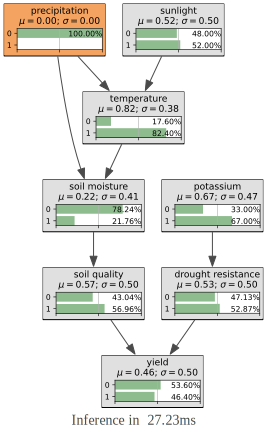

0.5410727148608

In [41]:

gnb.showInference(bn,evs={'precipitation':0})

ie=gum.VariableElimination(bn)

ie.setEvidence({'precipitation':1})


ie.makeInference()
ie.posterior("yield")[1]
